🆔 ID de fila: Identificador único para cada entrada.

📦 ID de pedido: Identificador único del pedido.

📅 Fecha de pedido: Fecha en que se realizó el pedido.

🚚 Fecha de envío: Fecha en que se envió el pedido.

📦 Modo de envío: Método de envío utilizado.

👤 ID de cliente: Identificador único para cada cliente.

🏷 Nombre del cliente: Nombre del cliente.

🎯 Segmento: Segmento de mercado (p. ej., consumidor, empresa).

🌎 País: País donde se realizó el pedido.

🏙 Ciudad: Ciudad donde se realizó el pedido.

🏛 Estado: Estado donde se realizó el pedido.

📮 Código postal: Código postal del cliente.

🌍 Región: Región geográfica.

🔢 ID de producto: Identificador único del producto. 

🛍 Categoría: Categoría del producto (p. ej., Muebles, Material de Oficina).

🗂 Subcategoría: Subcategoría del producto.

🏷 Nombre del producto: Nombre del producto.

💰 Ventas: Importe total de las ventas.

📦 Cantidad: Cantidad de artículos comprados.

🎟 Descuento: Descuento aplicado.

💸 Beneficio: Ganancia generada por la venta.

In [74]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('stores_sales_forecasting.csv', encoding="latin1")

In [5]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
df.shape

(2121, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [8]:
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [32]:
# Agrupar por ciudad y sumar las ventas
top_regiones = df.groupby('Region')['Quantity'].sum().sort_values(ascending=False)

In [33]:
top_regiones

Region
West       2696
East       2214
Central    1827
South      1291
Name: Quantity, dtype: int64

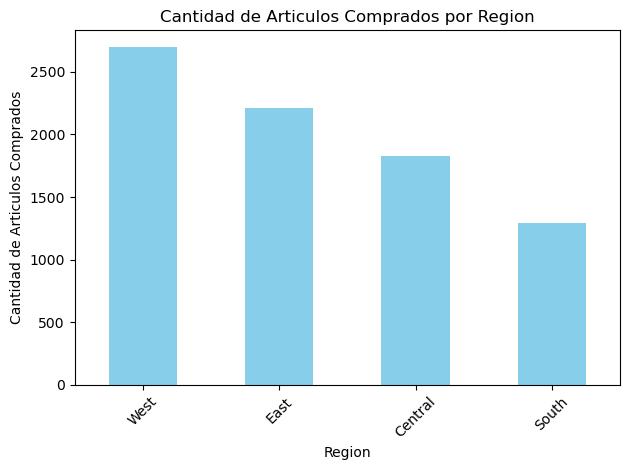

In [60]:
top_regiones.plot(kind='bar', color='skyblue')

plt.title('Cantidad de Articulos Comprados por Region')
plt.xlabel('Region')
plt.ylabel('Cantidad de Articulos Comprados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
paises_ventas = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)

In [38]:
paises_ventas

Country
United States    8028
Name: Quantity, dtype: int64

C:\Users\pauli\AppData\Local\Temp\ipykernel_6284\3160324140.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


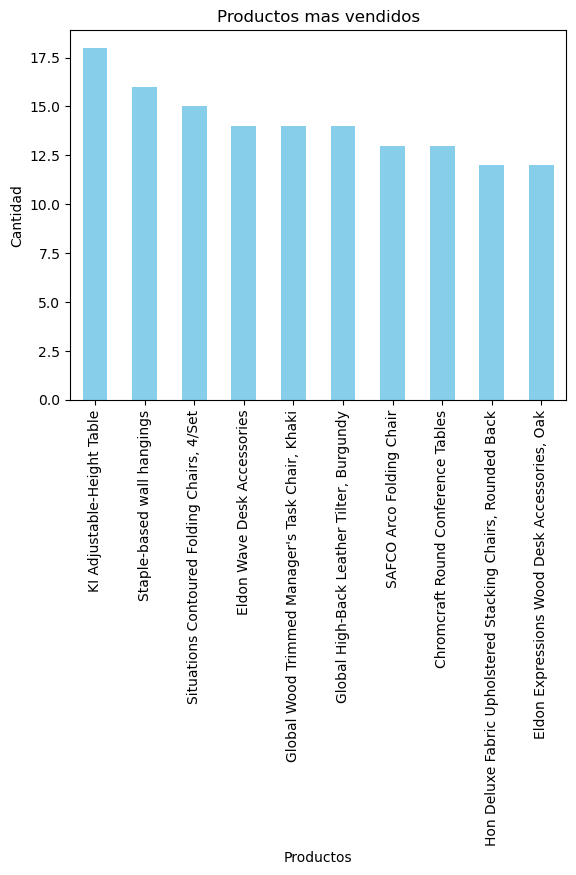

In [54]:
# Productos mas vendidos
df['Product Name'].value_counts().head(10).plot(kind='bar', color='skyblue')

plt.title('Productos mas vendidos')
plt.xlabel('Productos')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

In [ ]:
# Agrupar por Producto y Profit
prod_con_mas_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

C:\Users\pauli\AppData\Local\Temp\ipykernel_6284\2129059782.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


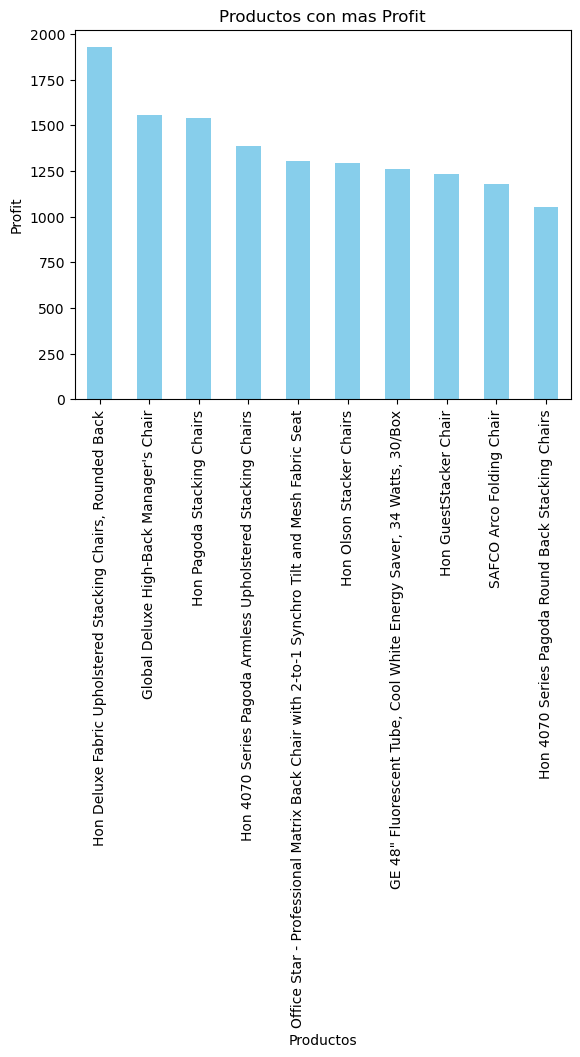

In [53]:
prod_con_mas_profit.plot(kind='bar', color='skyblue')
plt.title('Productos con mas Profit')
plt.xlabel('Productos')
plt.ylabel('Profit')
plt.tight_layout()
plt.show()

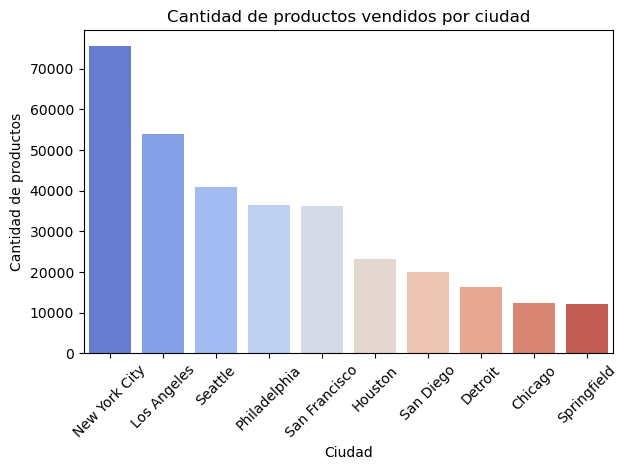

In [88]:
prods_vend_por_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=prods_vend_por_city.index, y=prods_vend_por_city.values, palette='coolwarm')
plt.title('Cantidad de productos vendidos por ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de productos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

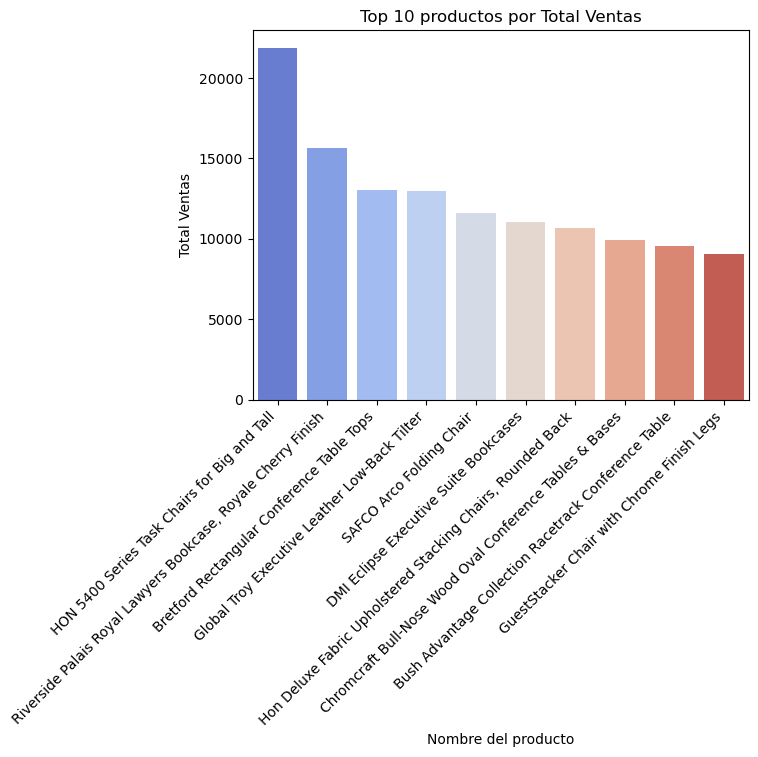

In [91]:
top_products = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)

sns.barplot(x=top_products.index, y=top_products.values, palette='coolwarm')
plt.title('Top 10 productos por Total Ventas')
plt.xlabel('Nombre del producto')
plt.ylabel('Total Ventas')
plt.xticks(rotation=45, ha='right')
plt.show()

<Axes: ylabel='Quantity'>

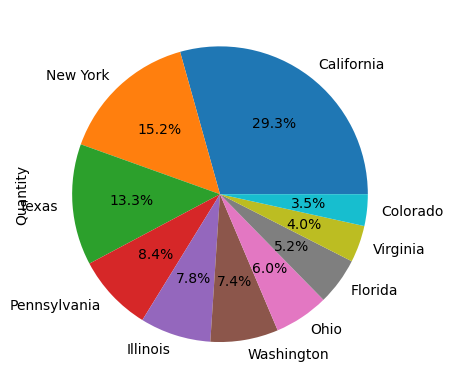

In [72]:
prods_vend_por_state = df.groupby('State')['Quantity'].sum().sort_values(ascending=False).head(10)
prods_vend_por_state.plot(kind='pie', autopct='%1.1f%%')

<Axes: ylabel='Sales'>

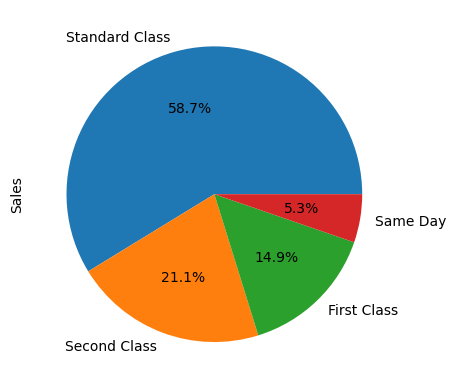

In [83]:
metodos_de_envio = df.groupby('Ship Mode')['Sales'].sum().sort_values(ascending=False).head(10)
metodos_de_envio.plot(kind='pie', autopct='%1.1f%%')

Ship Mode
Standard Class    1248
Second Class       427
First Class        327
Same Day           119
Name: count, dtype: int64


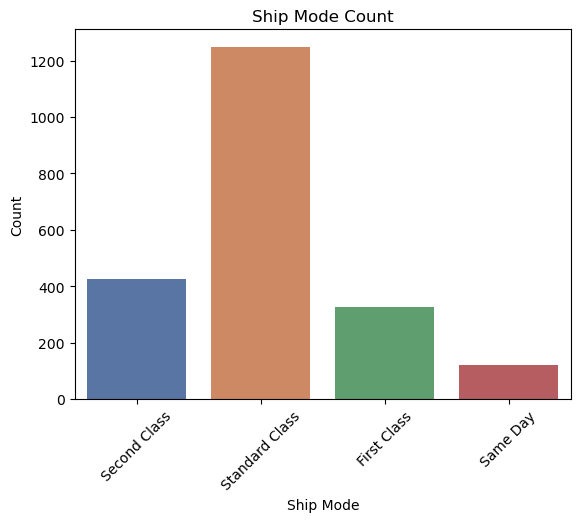

Segment
Consumer       1113
Corporate       646
Home Office     362
Name: count, dtype: int64


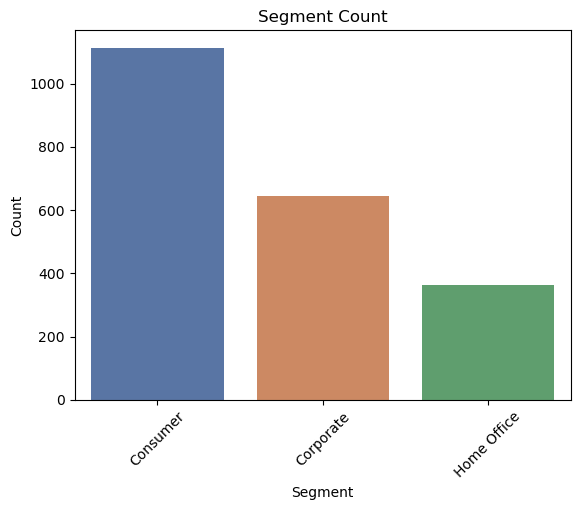

Region
West       707
East       601
Central    481
South      332
Name: count, dtype: int64


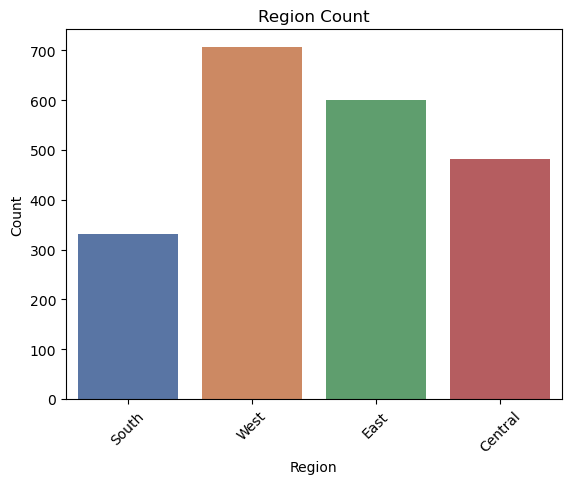

Sub-Category
Furnishings    957
Chairs         617
Tables         319
Bookcases      228
Name: count, dtype: int64


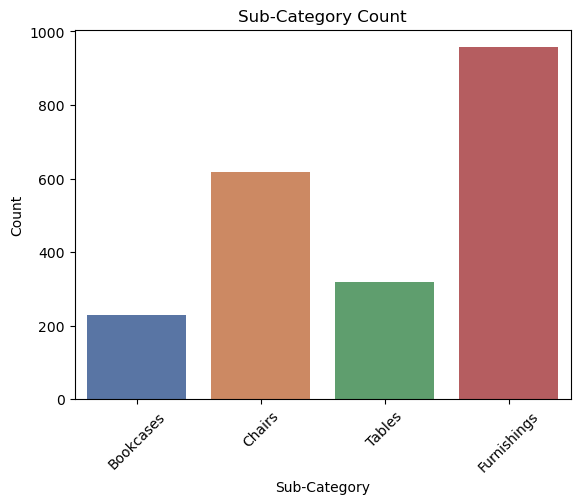

In [76]:
categorical_features = ['Ship Mode', 'Segment', 'Region', 'Sub-Category']

for feature in categorical_features:
    print(df[feature].value_counts())
    sns.countplot(x=feature, data=df, palette='deep')  # Corrected 'palette'
    plt.title(f'{feature} Count')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


y = df['Sales']

X = df.drop(['Sales', 'Product Name'], axis=1)

X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Linear Regression Performance:")
print("R^2 score:", f"{score:.2%}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Linear Regression Performance:
R^2 score: -692441430.11%
MAE: 813676.32
MSE: 2121780497400.44
RMSE: 1456633.27


In [79]:
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2 = r2_score(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)

print("Random Forest Regression Performance:")
print(f"R² Score: {r2:.2%}")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

Random Forest Regression Performance:
R² Score: 79.17%
MAE: 73.80
MSE: 63816.23
RMSE: 252.62


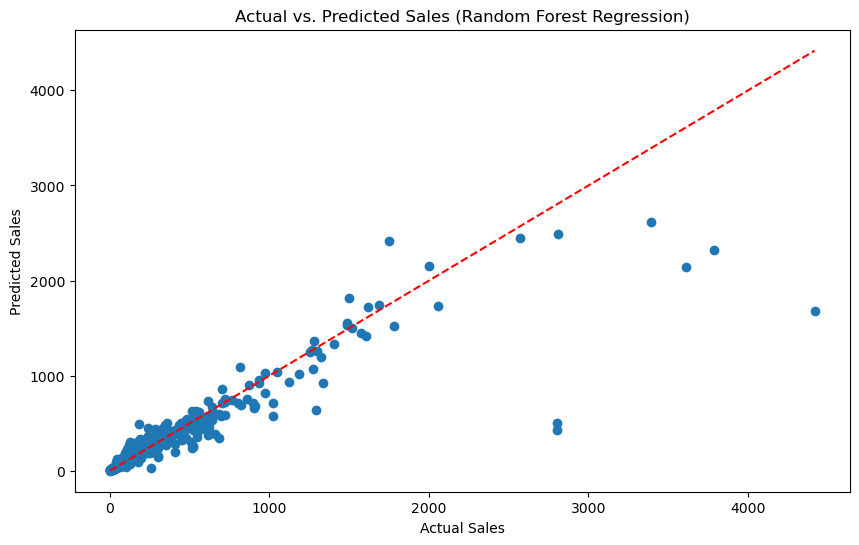

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs. Predicted Sales (Random Forest Regression)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()